In [ ]:
# # Corpus Building
# !pip install newspaper3k, feedparser
# # !pip3 install newspaper3k
# from newspaper import Article
# import feedparser as fd
# url = 'https://nypost.com/tag/crime/feed/'
# article = Article(url)

In [ ]:
# article.download()
# current_feed_xml = article.html
# NewsFeed = fd.parse("https://nypost.com/tag/crime/feed/")
# entries = NewsFeed.entries
# # print(entries.keys())

# # print(entry)


In [ ]:
# allfeeds = []
# # print(len(entries))
# for entry in entries:
#     feedData = {}
#     feedData['title'] = entry.title
#     feedData['published'] = entry.published
#     feedData['summary'] = entry.summary
#     feedData['link'] = entry.link
#     feedData['description'] = entry.description
#     allfeeds.append(feedData)

#     # print(feedData)
# # print(allfeeds)
# print(entries[0].keys())
# print(entries[0]['title_detail'])

In [ ]:
# def getDataFromFeedLink(link):

#     data = Article(link)

#     data.download()
#     data.parse()
#     # data.nlp()
#     # print(data.keywords)
#     # print(data.text)
#     return data.text


# for feed in allfeeds:
#     text = getDataFromFeedLink(feed['link'])
#     feed['text'] = text


In [ ]:
import pandas as pd
# df  = pd.DataFrame(allfeeds)
# df.set_index('title', inplace=True)
# prev_df = pd.read_csv("newsdata.csv",index_col='title')
# lt = pd.concat([prev_df,df]).drop_duplicates()
# lt
# lt.to_csv('newsdata.csv')



In [ ]:
prev_df = pd.read_csv("newsdata.csv")
prev_df.shape

FileNotFoundError: ignored

In [ ]:
import pandas as pd
import re
df = pd.read_csv("newsdata.csv")

In [ ]:
#cleaning the tweets
#removing unwanted characters

def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'[^\w\s\/]', '', text)

  return text

df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(clean)
df.head(1)

,timestamp,title,published,summary,link,description,text
0,1,Video shows 26-year-old man slashed during dis...,"Tue, 15 Mar 2022 00:04:06 -0400",A 26-year-old man was slashed in the face duri...,https://nypost.com/2022/03/15/video-shows-26-y...,A 26-year-old man was slashed in the face duri...,a 26yearold man was slashed in the face during...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def tokenize(text):
  # gg = nltk.data(text)
  # join(tokenizer.tokenize(data))
  return nltk.word_tokenize(text)

df['Tokenized_text'] = df["text"].apply(tokenize)

In [ ]:
#removal of stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# print(stop_words)

def remove_stopwords(text_arr):
  for word in stop_words:
    while(word in text_arr):
      text_arr.remove(word)


  return text_arr

df["Without_Stopwords_text"] = df["Tokenized_text"].apply(remove_stopwords)
df.drop(columns='Tokenized_text',axis=1,inplace=True)
df.head()

,timestamp,title,published,summary,link,description,text,Without_Stopwords_text
0,1,Video shows 26-year-old man slashed during dis...,"Tue, 15 Mar 2022 00:04:06 -0400",A 26-year-old man was slashed in the face duri...,https://nypost.com/2022/03/15/video-shows-26-y...,A 26-year-old man was slashed in the face duri...,a 26yearold man was slashed in the face during...,"[26yearold, man, slashed, face, argument, manh..."
1,2,Amazon relocating employees from Seattle offic...,"Mon, 14 Mar 2022 22:43:40 -0400","Roughly 1,800 Amazon employees are assigned to...",https://nypost.com/2022/03/14/amazon-relocatin...,"Roughly 1,800 Amazon employees are assigned to...",amazon is temporarily relocating employees fro...,"[amazon, temporarily, relocating, employees, c..."
2,3,NYC woman accused of holding online ?date? hos...,"Mon, 14 Mar 2022 20:05:22 -0400","Valerie Rosario, 22, is facing charges of kidn...",https://nypost.com/2022/03/14/nyc-woman-charge...,"Valerie Rosario, 22, is facing charges of kidn...",late one night last month a 24yearold man head...,"[late, one, night, last, month, 24yearold, man..."
3,4,New poll finds 61% of New Yorkers approve of M...,"Mon, 14 Mar 2022 19:58:15 -0400",The Marist College poll found 61 percent of re...,https://nypost.com/2022/03/14/61-of-new-yorker...,The Marist College poll found 61 percent of re...,a solid majority of new york city residents ar...,"[solid, majority, new, york, city, residents, ..."
4,5,Yonkers man hit with hate crime in ?appalling?...,"Mon, 14 Mar 2022 17:50:05 -0400",Tammel Esco charged with a hate crime in the b...,https://nypost.com/2022/03/14/yonkers-man-hit-...,Tammel Esco charged with a hate crime in the b...,a yonkers man has been charged with a hate cri...,"[yonkers, man, charged, hate, crime, brutal, b..."


In [ ]:
docs = df["text"]
query = "wanted or robbery or assault or gun or shot or wantedfor or forcibly or stabbed or firearm or arrested or punched or burglary or perpetrator or wantedrobbery or reckless or endangerment or arrest or struck or grabbed or guns or firearms or touching or loaded or dispute or crime or assaulted or forcible or killed or rifles or illegal or knife or buttocks or rape or fleeing or broke or lewdness or criminal or gang or pushed or robberies or handguns or hit or kicked or homicide or shotguns or wantedassault or larceny or stole or missing or murder or violence or ghost or harassment or fire or burglaries or violent or manslaughter or apprehension or stolen or assaults or murders or sharp or wantedassaults or shooting or chokehold or raped"

In [ ]:
# building Boolean Model
#creating a bitmap according to the given query
bitmap = []
words_all = query.split(' ')
words_required = []
words_connectors = []

for i in range(0,len(words_all)):
  if i%2==0:
    words_required.append(words_all[i])
  else:
    words_connectors.append(words_all[i])

query_len = len(words_required)

for text in docs:
  temp = []
  for word in words_required:
    if word in text:
      temp.append(1)
    else:
      temp.append(0)
  bitmap.append(temp)
bitmap

[[0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  

In [ ]:
bitmap_results = []
for doc in bitmap:
  for i in range(0,query_len-1):
    if i==0:
      if words_connectors[i]=="and":
        result = doc[i] & doc[i+1]
      else:
        result = doc[i] | doc[i+1]
    elif words_connectors[i]=="and":
      result = result & doc[i+1]
    else:
      result = result | doc[i+1]
  bitmap_results.append(result)


In [ ]:
bitmap_results.count(0)

2

In [ ]:
bitmap_results.count(1)

159

In [ ]:
# Extracting Location Model
!pip install https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.1.0/xx_ent_wiki_sm-3.1.0.tar.gz


     |████████████████████████████████| 11.5 MB 95 kB/s 
     |████████████████████████████████| 5.9 MB 4.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 18.7 MB/s 
     |████████████████████████████████| 457 kB 40.6 MB/s 
     |████████████████████████████████| 653 kB 57.7 MB/s 
  Created wheel for xx-ent-wiki-sm: filename=xx_ent_wiki_sm-3.1.0-py3-none-any.whl size=11614080 sha256=2c465d3d872d414b6ddac84c8a5ed986a1d76a295c6d98ede4bf5db96fb832ff
  Stored in directory: /root/.cache/pip/wheels/28/fd/d0/ba2d79aefd94a8701e6d88476e5816c8d5845932acd0dbb59e
Successfully built xx-ent-wiki-sm
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled c

In [ ]:
import spacy
from spacy import displacy
nlp_wk = spacy.load("xx_ent_wiki_sm")


In [ ]:
df["Location"] = df["Without_Stopwords_text"].apply(extract_location)
df

,timestamp,title,published,summary,link,description,text,Without_Stopwords_text,Location
0,1,Video shows 26-year-old man slashed during dis...,"Tue, 15 Mar 2022 00:04:06 -0400",A 26-year-old man was slashed in the face duri...,https://nypost.com/2022/03/15/video-shows-26-y...,A 26-year-old man was slashed in the face duri...,a 26yearold man was slashed in the face during...,"[26yearold, man, slashed, face, argument, manh...",[manhattan]
1,2,Amazon relocating employees from Seattle offic...,"Mon, 14 Mar 2022 22:43:40 -0400","Roughly 1,800 Amazon employees are assigned to...",https://nypost.com/2022/03/14/amazon-relocatin...,"Roughly 1,800 Amazon employees are assigned to...",amazon is temporarily relocating employees fro...,"[amazon, temporarily, relocating, employees, c...","[amazon, downtown seattle, avenue pine street ..."
2,3,NYC woman accused of holding online ?date? hos...,"Mon, 14 Mar 2022 20:05:22 -0400","Valerie Rosario, 22, is facing charges of kidn...",https://nypost.com/2022/03/14/nyc-woman-charge...,"Valerie Rosario, 22, is facing charges of kidn...",late one night last month a 24yearold man head...,"[late, one, night, last, month, 24yearold, man...","[bronx, manhattan, manhattan]"
3,4,New poll finds 61% of New Yorkers approve of M...,"Mon, 14 Mar 2022 19:58:15 -0400",The Marist College poll found 61 percent of re...,https://nypost.com/2022/03/14/61-of-new-yorker...,The Marist College poll found 61 percent of re...,a solid majority of new york city residents ar...,"[solid, majority, new, york, city, residents, ...","[new york city, new york city 66, new york cit..."
4,5,Yonkers man hit with hate crime in ?appalling?...,"Mon, 14 Mar 2022 17:50:05 -0400",Tammel Esco charged with a hate crime in the b...,https://nypost.com/2022/03/14/yonkers-man-hit-...,Tammel Esco charged with a hate crime in the b...,a yonkers man has been charged with a hate cri...,"[yonkers, man, charged, hate, crime, brutal, b...",[]
...,...,...,...,...,...,...,...,...,...
156,2022-04-07 18:25:53-04:00,Shoplifters busted after nabbing $70K in merch...,"Thu, 07 Apr 2022 18:25:53 -0400",A wild video shows a trio of thieves had their...,https://nypost.com/2022/04/07/shoplifters-bust...,A wild video shows a trio of thieves had their...,video shows the moment a trio of thieves had t...,"[video, shows, moment, trio, thieves, getaway,...","[janavia, new jersey]"
157,2022-04-10 10:19:29-04:00,"Mayor Adams ‘concerned’ about summer crime, vo...","Sun, 10 Apr 2022 10:19:29 -0400",Mayor Eric Adams said Sunday he is “concerned”...,https://nypost.com/2022/04/10/eric-adams-conce...,Mayor Eric Adams said Sunday he is “concerned”...,mayor eric adams said sunday he is concerned a...,"[mayor, eric, adams, said, sunday, concerned, ...",[]
158,2022-04-10 09:23:41-04:00,Illinois man arrested for allegedly burying hi...,"Sun, 10 Apr 2022 09:23:41 -0400",Michael Lelko will be charged with two felony ...,https://nypost.com/2022/04/10/illinois-man-arr...,Michael Lelko will be charged with two felony ...,an illinois man suspected of hiding the deaths...,"[illinois, man, suspected, hiding, deaths, mot...","[illinois, chicago, chicago]"
159,2022-04-10 08:25:15-04:00,Man stabbed in head during ‘unprovoked attack’...,"Sun, 10 Apr 2022 08:25:15 -0400",A 36-year-old man was stabbed in the back of t...,https://nypost.com/2022/04/10/man-stabbed-in-h...,A 36-year-old man was stabbed in the back of t...,a 36yearold man was stabbed in the back of the...,"[36yearold, man, stabbed, back, head, unprovok...",[]


In [ ]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#geocoding
def get_geocode(loc):
  coor = []
  loc=str(loc).replace("'","").replace("[","").replace("]","")
  try:
    location = geolocator.geocode(loc)
  except:
    location=None

  if location!=None:
    coor.append(location.latitude)
    coor.append(location.longitude)
  return coor


In [ ]:
# 2 seperate columns- LATITUDE
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#geocoding
def get_geocode_lat(loc):
  loc=str(loc).replace("'","").replace("[","").replace("]","")
  try:
    location = geolocator.geocode(loc)
  except:
    location=None

  if location!=None:
    return location.latitude
  return None


In [ ]:
# 2 seperate columns- LONGITUDE
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
#geocoding
def get_geocode_lon(loc):
  loc=str(loc).replace("'","").replace("[","").replace("]","")
  try:
    location = geolocator.geocode(loc)
  except:
    location=None

  if location!=None:
    return location.longitude
  return None


In [ ]:
df["Latitude"] = df["Location"].apply(get_geocode_lat)
df["Longitude"] = df["Location"].apply(get_geocode_lon)
df

,timestamp,title,published,summary,link,description,text,Without_Stopwords_text,Location,Latitude,Longitude
0,1,Video shows 26-year-old man slashed during dis...,"Tue, 15 Mar 2022 00:04:06 -0400",A 26-year-old man was slashed in the face duri...,https://nypost.com/2022/03/15/video-shows-26-y...,A 26-year-old man was slashed in the face duri...,a 26yearold man was slashed in the face during...,"[26yearold, man, slashed, face, argument, manh...",[manhattan],40.789624,-73.959894
1,2,Amazon relocating employees from Seattle offic...,"Mon, 14 Mar 2022 22:43:40 -0400","Roughly 1,800 Amazon employees are assigned to...",https://nypost.com/2022/03/14/amazon-relocatin...,"Roughly 1,800 Amazon employees are assigned to...",amazon is temporarily relocating employees fro...,"[amazon, temporarily, relocating, employees, c...","[amazon, downtown seattle, avenue pine street ...",NaN,NaN
2,3,NYC woman accused of holding online ?date? hos...,"Mon, 14 Mar 2022 20:05:22 -0400","Valerie Rosario, 22, is facing charges of kidn...",https://nypost.com/2022/03/14/nyc-woman-charge...,"Valerie Rosario, 22, is facing charges of kidn...",late one night last month a 24yearold man head...,"[late, one, night, last, month, 24yearold, man...","[bronx, manhattan, manhattan]",40.798554,-73.918135
3,4,New poll finds 61% of New Yorkers approve of M...,"Mon, 14 Mar 2022 19:58:15 -0400",The Marist College poll found 61 percent of re...,https://nypost.com/2022/03/14/61-of-new-yorker...,The Marist College poll found 61 percent of re...,a solid majority of new york city residents ar...,"[solid, majority, new, york, city, residents, ...","[new york city, new york city 66, new york cit...",40.751269,-73.984820
4,5,Yonkers man hit with hate crime in ?appalling?...,"Mon, 14 Mar 2022 17:50:05 -0400",Tammel Esco charged with a hate crime in the b...,https://nypost.com/2022/03/14/yonkers-man-hit-...,Tammel Esco charged with a hate crime in the b...,a yonkers man has been charged with a hate cri...,"[yonkers, man, charged, hate, crime, brutal, b...",[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
156,2022-04-07 18:25:53-04:00,Shoplifters busted after nabbing $70K in merch...,"Thu, 07 Apr 2022 18:25:53 -0400",A wild video shows a trio of thieves had their...,https://nypost.com/2022/04/07/shoplifters-bust...,A wild video shows a trio of thieves had their...,video shows the moment a trio of thieves had t...,"[video, shows, moment, trio, thieves, getaway,...","[janavia, new jersey]",NaN,NaN
157,2022-04-10 10:19:29-04:00,"Mayor Adams ‘concerned’ about summer crime, vo...","Sun, 10 Apr 2022 10:19:29 -0400",Mayor Eric Adams said Sunday he is “concerned”...,https://nypost.com/2022/04/10/eric-adams-conce...,Mayor Eric Adams said Sunday he is “concerned”...,mayor eric adams said sunday he is concerned a...,"[mayor, eric, adams, said, sunday, concerned, ...",[],NaN,NaN
158,2022-04-10 09:23:41-04:00,Illinois man arrested for allegedly burying hi...,"Sun, 10 Apr 2022 09:23:41 -0400",Michael Lelko will be charged with two felony ...,https://nypost.com/2022/04/10/illinois-man-arr...,Michael Lelko will be charged with two felony ...,an illinois man suspected of hiding the deaths...,"[illinois, man, suspected, hiding, deaths, mot...","[illinois, chicago, chicago]",41.896471,-87.635719
159,2022-04-10 08:25:15-04:00,Man stabbed in head during ‘unprovoked attack’...,"Sun, 10 Apr 2022 08:25:15 -0400",A 36-year-old man was stabbed in the back of t...,https://nypost.com/2022/04/10/man-stabbed-in-h...,A 36-year-old man was stabbed in the back of t...,a 36yearold man was stabbed in the back of the...,"[36yearold, man, stabbed, back, head, unprovok...",[],NaN,NaN


In [ ]:
#dropping the rows which do not have coordinate info
print("Number of rows having coordinates:",len(df)-df["Latitude"].isnull().sum())
df_crimes_coor = df.dropna(axis=0)
df_crimes_coor.shape

Number of rows having coordinates: 67


(67, 11)

In [ ]:
# long: -74 to -73.7
# lat: 40.5 to 40.9
#dropping rows which are outliers acc to geo coordinates

df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Longitude'] >= -75)]
df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Longitude'] <= -73)]
df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Latitude'] <= 50)]
df_crimes_coor = df_crimes_coor.loc[(df_crimes_coor['Latitude'] >= 40)]
df_crimes_coor

,timestamp,title,published,summary,link,description,text,Without_Stopwords_text,Location,Latitude,Longitude
0,1,Video shows 26-year-old man slashed during dis...,"Tue, 15 Mar 2022 00:04:06 -0400",A 26-year-old man was slashed in the face duri...,https://nypost.com/2022/03/15/video-shows-26-y...,A 26-year-old man was slashed in the face duri...,a 26yearold man was slashed in the face during...,"[26yearold, man, slashed, face, argument, manh...",[manhattan],40.789624,-73.959894
2,3,NYC woman accused of holding online ?date? hos...,"Mon, 14 Mar 2022 20:05:22 -0400","Valerie Rosario, 22, is facing charges of kidn...",https://nypost.com/2022/03/14/nyc-woman-charge...,"Valerie Rosario, 22, is facing charges of kidn...",late one night last month a 24yearold man head...,"[late, one, night, last, month, 24yearold, man...","[bronx, manhattan, manhattan]",40.798554,-73.918135
3,4,New poll finds 61% of New Yorkers approve of M...,"Mon, 14 Mar 2022 19:58:15 -0400",The Marist College poll found 61 percent of re...,https://nypost.com/2022/03/14/61-of-new-yorker...,The Marist College poll found 61 percent of re...,a solid majority of new york city residents ar...,"[solid, majority, new, york, city, residents, ...","[new york city, new york city 66, new york cit...",40.751269,-73.984820
10,11,Stop this spiral of madness: Time for Hizzoner...,"Sun, 13 Mar 2022 23:34:34 -0400","Another weekend, another parade of horrors in ...",https://nypost.com/2022/03/13/stop-this-spiral...,"Another weekend, another parade of horrors in ...",another weekend another parade of horrors in n...,"[another, weekend, another, parade, horrors, n...","[new york city, new york, us]",40.712728,-74.006015
11,12,15-year old stabbed on subway platform in late...,"Sun, 13 Mar 2022 22:53:04 -0400",A 15-year-old male was stabbed on a subway pla...,https://nypost.com/2022/03/13/nypd-15-year-old...,A 15-year-old male was stabbed on a subway pla...,a 15yearold male was stabbed on a subway platf...,"[15yearold, male, stabbed, subway, platform, m...",[harlem],40.807879,-73.945415
15,16,NYPD top cop Keechant Sewell says bail reform ...,"Sun, 13 Mar 2022 13:34:19 -0400",NYPD Commissioner Keechant Sewell said New Yor...,https://nypost.com/2022/03/13/nypd-boss-keecha...,NYPD Commissioner Keechant Sewell said New Yor...,new york states bail reform law which has all...,"[new, york, states, bail, reform, law, allowed...","[new york, new york, new york]",40.712728,-74.006015
17,18,"As dangerous perps keep walking free, Hochul a...","Sat, 12 Mar 2022 20:52:09 -0500","Finally, some Democrats in the Legislature are...",https://nypost.com/2022/03/12/hochul-and-dems-...,"Finally, some Democrats in the Legislature are...",finally some democrats in the legislature are ...,"[finally, democrats, legislature, pushing, fix...",[manhattan],40.789624,-73.959894
21,22,Democrats oppose Kathy Hochul?s bail-reform ro...,"Wed, 23 Mar 2022 17:37:10 -0400",Gov. Kathy Hochuls plan to roll back New York'...,https://nypost.com/2022/03/23/kathy-hochuls-ny...,Gov. Kathy Hochuls plan to roll back New York'...,gov kathy hochuls plan to roll back new yorks ...,"[gov, kathy, hochuls, plan, roll, back, new, y...","[new york, new york state, new york city]",40.766400,-73.773878
28,29,Suspect wanted for attempted murder during Har...,"Wed, 23 Mar 2022 13:56:31 -0400",Rasheen Davis was nabbed in connection with th...,https://nypost.com/2022/03/23/suspect-arrested...,Rasheen Davis was nabbed in connection with th...,a brute who allegedly attacked a woman on a ha...,"[brute, allegedly, attacked, woman, harlem, bl...",[harlem],40.807879,-73.945415
29,30,New troubling details emerge in death of 8-yea...,"Wed, 23 Mar 2022 11:52:26 -0400",The mom and step-dad of an autistic 8-year-old...,https://nypost.com/2022/03/23/new-details-emer...,The mom and step-dad of an autistic 8-year-old...,the mom and stepdad of an autistic 8yearold br...,"[mom, stepdad, autistic, 8yearold, bronx, boy,...",[bronx],40.846651,-73.878594


In [ ]:
#df_crimes = pd.read_csv('extracted coordinates.csv')
#df_crimes
df_crimes_coor.to_csv("extracted coordinates filtered.csv")

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 44.8 MB/s 
     |████████████████████████████████| 16.7 MB 341 kB/s 


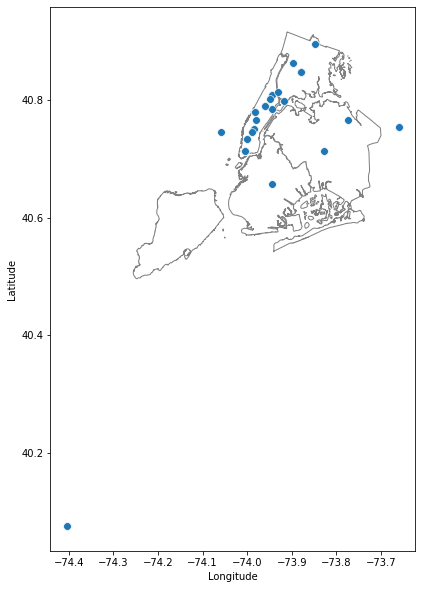

In [ ]:
  !pip install geopandas

  import geopandas as gpd
  from shapely import wkt
  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
  nyc.head(5)

  import seaborn as sns
  import matplotlib
  import matplotlib.pyplot as plt

  df_wm = nyc.to_crs(epsg=4326)
  fig,ax = plt.subplots(1,1, figsize=(10,10))
  base = df_wm.plot(color='white', edgecolor='grey', ax=ax)
  sns.scatterplot(x='Longitude', y='Latitude',s=60, data=df_crimes_coor)
  plt.show()

In [ ]:
df_crimes_coor.shape

(41, 11)